In [3]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
from keras.regularizers import l2 

In [4]:
df=pd.read_csv('fer2013.csv')

In [5]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [6]:
df.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [11]:
num_labels = 7  
batch_size = 128  
epochs = 50  
width, height = 48, 48

x_train,y_train,x_test,y_test=[],[],[],[]
for index, row in df.iterrows():
    
    try:
        val= row['pixels'].split(" ")
        if 'Training' in row['Usage']:
            x_train.append(np.array(val, 'float32'))
            y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            x_test.append(np.array(val, 'float32'))
            y_test.append(row['emotion'])
    except:
        print(f"error occured at index:{index} and row:{row}")

print(f"x_train sample data:{x_train[0:2]}")
print(f"y_train sample data:{y_train[0:2]}")
print(f"x_test sample data:{x_test[0:2]}")
print(f"y_test sample data:{y_test[0:2]}")

x_train=np.array(x_train,'float32')
y_train=np.array(y_train,'float32')
x_test=np.array(x_test,'float32')
y_test=np.array(y_test,'float32')



y_train=np_utils.to_categorical(y_train, num_classes=num_labels)
y_test=np_utils.to_categorical(y_test, num_classes=num_labels)

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')


x_train sample data:[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32), array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)]
y_train sample data:[0, 0]
x_test sample data:[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32)]
y_test sample data:[0, 1]


In [13]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [12]:
model = Sequential()  
  
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1:])))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.2))  
  
#2nd convolution layer  
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.2))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax')) 


In [13]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])  
  
#Training the model  
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),  
          shuffle=True) 

Epoch 1/50
225/225 [==============================] - 407s 2s/step - loss: 1.6826 - accuracy: 0.3219 - val_loss: 1.7199 - val_accuracy: 0.3137
Epoch 2/50
225/225 [==============================] - 462s 2s/step - loss: 1.4091 - accuracy: 0.4586 - val_loss: 1.4337 - val_accuracy: 0.4556
Epoch 3/50
225/225 [==============================] - 1752s 8s/step - loss: 1.2925 - accuracy: 0.5062 - val_loss: 1.3262 - val_accuracy: 0.5007
Epoch 4/50
225/225 [==============================] - 317s 1s/step - loss: 1.2235 - accuracy: 0.5330 - val_loss: 1.2743 - val_accuracy: 0.5247
Epoch 5/50
225/225 [==============================] - 309s 1s/step - loss: 1.1607 - accuracy: 0.5574 - val_loss: 1.2781 - val_accuracy: 0.5096
Epoch 6/50
225/225 [==============================] - 345s 2s/step - loss: 1.1160 - accuracy: 0.5761 - val_loss: 1.5794 - val_accuracy: 0.4486
Epoch 7/50
225/225 [==============================] - 357s 2s/step - loss: 1.0692 - accuracy: 0.5959 - val_loss: 1.2082 - val_accuracy: 0.549

In [14]:
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5") 

In [16]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.1204385757446289
Train accuracy: 95.86541056632996
Test loss: 2.253530263900757
Test accuracy: 58.846473693847656


In [17]:
monitor_testset_results = True
if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)
    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()

            print(i)

            emotion_analysis(i)
            print("----------------------------------------------")
            index = index + 1

In [19]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[221,   9,  30,  47,  67,  18,  75],
       [ 17,  24,   2,   4,   5,   2,   2],
       [ 54,   4, 188,  44,  80,  50,  76],
       [ 22,   2,  19, 744,  28,  19,  61],
       [ 63,   4,  85,  75, 281,  15, 130],
       [  8,   1,  27,  29,  12, 320,  18],
       [ 52,   1,  38,  92,  73,  17, 334]], dtype=int64)

In [20]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [24]:
import cv2
import os
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_alt.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            f_name = image.split('/')
            f_name = f_name[-1]
            
            cv2.imwrite("photo.jpg" + f_name, sub_face)
            #print ("Writing: " + image)

    except:
        pass

    #cv2.imshow(image, img)


if __name__ == '__main__':
        facecrop(file)

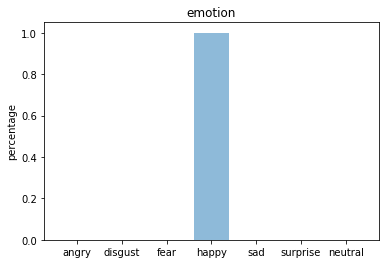

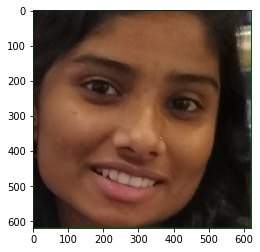

In [27]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'custom.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows